In [1]:
import numpy as np
from findiff import FinDiff
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


In [2]:
# The grid in space and time:
dx    = 0.02                       # spatial separation
x     = np.arange(0, 20, dx)       # spatial grid points
dt = 0.001  # time interval for snapshots
t0 = 0.0    # initial time
tf = 0.2    # final time
t_eval = np.arange(t0, tf, dt) 



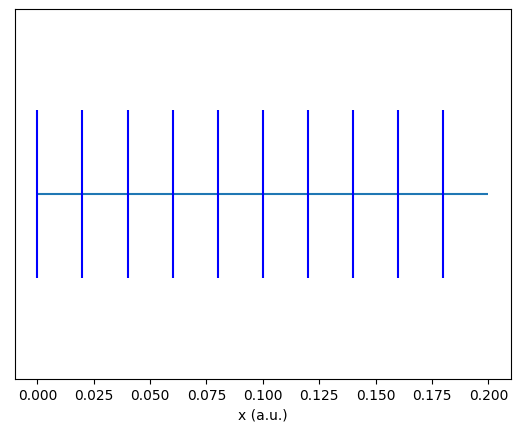

In [3]:
# plot x range
plt.figure()

plt.hlines(1,x[0],x[10])  # Draw a horizontal line
plt.eventplot(x[0:10], orientation='horizontal', colors='b')
#plt.axis('off')
plt.yticks([])
plt.xlabel("x (a.u.)")
plt.show()


\\[
A=\frac{1}{\sigma \sqrt{\pi}}
\\]

\\[
\psi=A e^{\frac{-\left(x-x_{0}\right)^{2}}{2 \sigma^{2}}} e^{+i k_{0}}
\\]

In [4]:
k0    = 20                         # wave number
m     = 1                          # mass
sigma = 0.1                        # width of initial gaussian wave-packet
x0    = 3.0                        # center of initial gaussian wave-packet

A = 1.0 / (sigma * np.sqrt(np.pi)) # normalization constant

# Initial Wavefunction
psi = np.sqrt(A) * np.exp(-(x-x0)**2 / (2.0 * sigma**2)) * np.exp(1j * k0 * x)

Plot of initial wave function

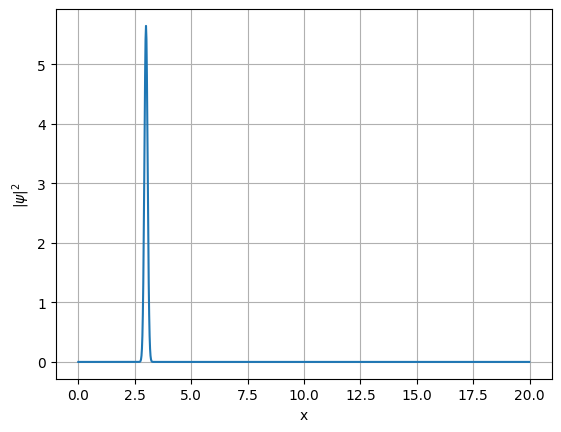

In [5]:
fig = plt.figure()
ax = fig.gca()
ax.set_xlabel('x')
ax.set_ylabel(r'$|\psi|^2$')
ax.grid()
ax.plot(x, np.abs(psi)**2)

# Solving Schrödinger equation with finite differences: 

More information on this approach: https://blog.cupcakephysics.com/computational%20physics/2014/11/02/the-finite-difference-method-and-schrodingers-equation.html

In [6]:

# The discretized Hamiltonian as a sparse matrix:
# atomic units:
hbar=1
m=1
H = -0.5 *hbar/m* FinDiff(0, x[1] - x[0], 2, acc=2).matrix(x.shape)

print(H.toarray())

[[-2500.  6250. -5000. ...     0.     0.     0.]
 [-1250.  2500. -1250. ...     0.     0.     0.]
 [    0. -1250.  2500. ...     0.     0.     0.]
 ...
 [    0.     0.     0. ...  2500. -1250.     0.]
 [    0.     0.     0. ... -1250.  2500. -1250.]
 [    0.     0.     0. ... -5000.  6250. -2500.]]


\\[
 \frac{\partial}{\partial t} \psi(t)=-iH  \psi(t)
\\]

In [7]:
# Solve time dependent Schrödinger equation
def psi_t(t, psi):
    return -1j * H.dot(psi)

sol = solve_ivp(psi_t, t_span = [t0,tf], 
                                y0 = psi, 
                                t_eval = t_eval,
                                method="RK23")

<IPython.core.display.Javascript object>


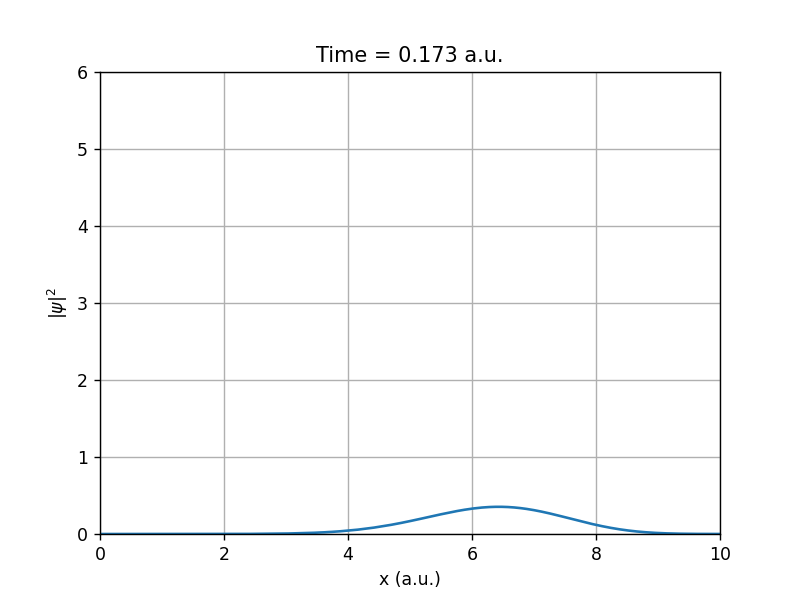

MovieWriter ffmpeg unavailable; using Pillow instead.


In [8]:
%matplotlib notebook
from matplotlib import animation
fig = plt.figure()
ax1 = plt.subplot(1,1,1)
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 6)
ax1.set_xlabel('x (a.u.)')
ax1.set_ylabel(r'$|\psi|^2$')
ax1.grid()
title = ax1.set_title('')
line1, = ax1.plot([], [])

def animate(i):
    line1.set_data(x, np.abs(sol.y[:,i])**2)
    title.set_text('Time = {0:1.3f} a.u.'.format(sol.t[i]))
    return line1,


anim = animation.FuncAnimation(fig, animate,
                               frames=len(sol.t), interval=50, blit=True)
anim.save("Broadening_Gaussian_wave_packet.gif")